In [1]:
pip install welford

Note: you may need to restart the kernel to use updated packages.


In [2]:
grafic=[]  ######## posizionati in un blocco a parte per permettere la realizzazione del grafico di confronto
oldconf=[0.0 for j in range(5)]



prcessing batch  1
prcessing batch  2
prcessing batch  3
prcessing batch  4
prcessing batch  5
prcessing batch  6
prcessing batch  7
prcessing batch  8
prcessing batch  9
prcessing batch  10
prcessing batch  11
prcessing batch  12
prcessing batch  13
prcessing batch  14
prcessing batch  15
prcessing batch  16
prcessing batch  17
prcessing batch  18
prcessing batch  19
prcessing batch  20
prcessing batch  21
prcessing batch  22
prcessing batch  23
prcessing batch  24
prcessing batch  25
prcessing batch  26
prcessing batch  27
prcessing batch  28
prcessing batch  29
prcessing batch  30
prcessing batch  31
prcessing batch  32
prcessing batch  33
prcessing batch  34
prcessing batch  35
prcessing batch  36
prcessing batch  37
prcessing batch  38
prcessing batch  39
prcessing batch  40
prcessing batch  41
prcessing batch  42
prcessing batch  43
prcessing batch  44
prcessing batch  45
prcessing batch  46
prcessing batch  47
prcessing batch  48
prcessing batch  49
prcessing batch  50
prcessing

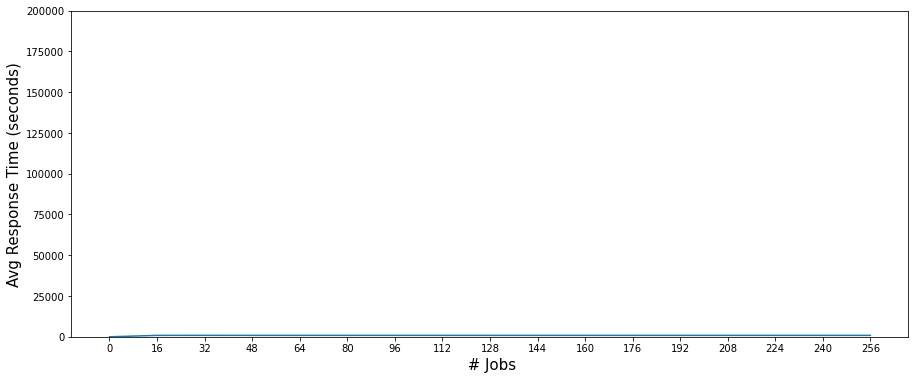

<Figure size 432x288 with 0 Axes>

for this configuration lambda is High  and centers are 4 10 48 13

the actual node statistics are:

      node     mean response time       std response time        w response time        utilizzation

       1          65.2200082             8.0758906            2.1038293          0.8234211
       2         139.4532060            11.8090307            3.0763400          0.9108794
       3         611.7192012            24.7329578            6.4431188          0.9147277
       4        1248.6462666            35.3361892            9.2053391          0.7431568


the system statistics are:

   mean response time   std response time     w response time      income

       874.4355462           29.5708564           7.7034272       2148.6703827 $


In [3]:
from ipynb.fs.full.rngs import plantSeeds, selectStream, random
from ipynb.fs.full.rvms import cdfNormal,idfNormal,idfStudent
from colorama import Fore, Style, Back
from math import log,exp,fabs, sqrt
from matplotlib import pyplot as plt
from welford import Welford
import numpy as np

#seed = 123456798
#seed = 365676778
seed = 222222223


#centers = [0,1,1,4,1]
#centers = [0,2,3,11,2]
centers = [0,4,10,48,13]

NODES=4
TINY = 1.0e-10
SQRT2PI = 2.506628274631  # #/* sqrt(2 * pi) */
PRICE=10
SCREEN=16

CASS=1
KITCHEN=2
TABLE=3
DELIVERY=4

MAXIMUM=95600000.0

LAMBDA1LOW=0.004067
LAMBDA1MID=0.015373
LAMBDA1HIGH=0.073208

LAMBDA2LOW=0.000208
LAMBDA2MID=0.000667
LAMBDA2HIGH=0.008271

NUM1LOW=0.951185
NUM1MID=0.958450
NUM1HIGH=0.898474

NUM2LOW=0.048815
NUM2MID=0.041550
NUM2HIGH=0.101526


n1=LAMBDA1HIGH
n2=LAMBDA2HIGH

b = 256
k=64
index_total= 0
q=1
flag=0
uscita=0

timer = [0.0 for i in range(NODES+1)]

START =   0.0                    # initial (open the door)        */
#STOP  =   75600.0                # secondi delle 21 ore del mcDonald */
arrivalTemp = [START for x in range(NODES+1)]
delivery=[]
deliv=0
total_val=[]
num=[]
w=[]
meanResponseTime=[]
aw=[]
bw=[]
cw=[]
dw=[]
ew=[]
fw=[]
gw=[]
newconf=[0.0 for j in range(5)]
string1=[]
string2=[]
b_array=[]
b_final_array=[]
b_last_array=[]

class TypeNode:
    id= None 
    ev= None 
    servers=0.0 
    index=None  
    sum=0.0 
    number= 0.0 
    area=0.0 
    flow=None 
    lamb=0.0  
    
    
    def __init__(self, id_node):
        self.id = id_node
        self.ev = Event()
        self.index = AccumSum()
        self.flow= Time()
        

class Event:
    t = 0.0 #next event time
    x =None  #event status, 0 or 1
    last= 0.0
    dv = 0

class Time:
    current = None          # current time                       */
    next = None             # next (most imminent) event time    */

class AccumSum:
                          # accumulated sums of                */
    service =0.0          #   service times                    */
    served = 0.0           #   number served                    */
    total= 0.0

class Data:
    
    node=None
    event=None
    verify=0

for j in range(SCREEN):
    w.append(Welford())

    
welfb=Welford()
welfinalb=Welford()
    
######funzioni per il grafico #########################################


def plot_stats_global():

    x = [i*SCREEN for i in range(SCREEN+1)]
    y = [meanResponseTime[i] for i in range(SCREEN+1)]
    idx=[0,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256]
    plt.figure(figsize=(15,6))
    plt.plot(x,y)
    plt.xticks(idx)
    plt.ylabel(ylabel="Avg Response Time (seconds)", fontsize=15)
    plt.tick_params(labelsize=10)
    plt.xlabel(xlabel=" # Jobs", fontsize=15)   
    plt.ylim(0, 200000)
    plt.figure()


    plt.show()
    
    
def plot_stats_global_comp():
    
    x = [i*SCREEN for i in range(SCREEN+1)]
    y = [grafic[i] for i in range(SCREEN+1)]
    z = [meanResponseTime[i] for i in range(SCREEN+1)]
    
    idy=[0,100,200,300,400,500, 600, 700, 800,900, 1000,1100,1200]
    idx=[0,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240,256]
    plt.figure(figsize=(15,6))
    plt.plot(x,y)
    plt.plot(x,z)
    plt.ylabel(ylabel="Avg Response Time (seconds)", fontsize=15)
    plt.tick_params(labelsize=10)
    plt.xlabel(xlabel="# Jobs", fontsize=15)
    plt.axhline(y=900, color='y', linestyle='--', label='QOS')
    #plt.axhline(y=final_avg_wait_system, color='b', linestyle='--', label='actual response time')
    plt.yticks(idy)
    plt.xticks(idx)
    plt.plot(x, y, label='previous configuration')
    plt.plot(x, z, label='actual configuration')
    plt.legend(loc='upper right')
    plt.ylim(0, 1200)
    plt.figure()


    plt.show()
    
    

def Exponential(m):
# ---------------------------------------------------
# * generate an Exponential random variate, use m > 0.0 
# * ---------------------------------------------------
# */
  return (-m * log(1.0 - random()))


def Normal(m, s):
    # ========================================================================
    # Returns a normal (Gaussian) distributed real number.
    # NOTE: use s > 0.0
    #
    # Uses a very accurate approximation of the normal idf due to Odeh & Evans,
    # J. Applied Statistics, 1974, vol 23, pp 96-97.
    # ========================================================================
    #
    p0 = 0.322232431088
    q0 = 0.099348462606
    p1 = 1.0
    q1 = 0.588581570495
    p2 = 0.342242088547
    q2 = 0.531103462366
    p3 = 0.204231210245e-1
    q3 = 0.103537752850
    p4 = 0.453642210148e-4
    q4 = 0.385607006340e-2

    u = random()
    if (u < 0.5):
        t = sqrt(-2.0 * log(u))
    else:
        t = sqrt(-2.0 * log(1.0 - u))

    p = p0 + t * (p1 + t * (p2 + t * (p3 + t * p4)))
    q = q0 + t * (q1 + t * (q2 + t * (q3 + t * q4)))

    if (u < 0.5):
        z = (p / q) - t
    else:
        z = t - (p / q)

    return (m + s * z)



def TruncatedNormal(m, s, a, b):
    # ---------------------------------------------------
# * generate a Truncated Normal random variate, use m,s,a,b > 0.0,
# * ---------------------------------------------------
# */
    alpha = cdfNormal(m, s, a)
    beta = 1.0 - cdfNormal(m, s, b)
    u = Uniform(alpha, 1.0 - beta)
    return idfNormal(m, s, u)

def Uniform(a,b):  
# --------------------------------------------
# * generate a Uniform random variate, use a < b 
# * --------------------------------------------
# */
  return (a + (b - a) * random())  


def GetArrival(m, node):
# ----------------------------------------------------
# * generate the next arrival time, with rate variable
# * --------------------------------------------------
# */ 
    global arrivalTemp
    
    if node==CASS:
        selectStream(0)
        arrivalTemp[node] += Exponential(1/m)
        return (arrivalTemp[node])
    elif node==KITCHEN:
        selectStream(1)
        arrivalTemp[node] += Exponential(1/m)
        return (arrivalTemp[node])

def GetService(i):
# --------------------------------------------
# * generate the next service time with rate 1/6
# * --------------------------------------------
# */     
    
    if i == CASS:
        selectStream(2)
        return (TruncatedNormal(45,4,10,80))
    elif i == KITCHEN:
        selectStream(3)
        return (TruncatedNormal(112,5,60,164))
    elif i == TABLE:
        selectStream(4)
        return (TruncatedNormal(600,20,200,1600))
    elif i == DELIVERY:
        selectStream(5)
        return (TruncatedNormal(1200,40,800,2000))
        


def CalcolateIncome():
    expence=0
    for i in range(1,NODES+1):
        expence+=(nodes[i].flow.current-timer[i])*nodes[i].servers*nodes[i].price
        
    return b*PRICE -(expence)

    
    
def choosePrice(i):
         
    if i == CASS:
        nodes[i].price=0.005421     
    
    if i == KITCHEN:
        nodes[i].price=0.0073655
        
    if i == TABLE:
        nodes[i].price=0.00062437          
        
    if i == DELIVERY:
        nodes[i].price=0.0003411
                
        
        
def NextNode(nodes):
# -------------------------------------
# * return the index of the next node 
# * -----------------------------------
# */
    time_events=[]
    
    data=Data()
    
    for i in range (1, len(nodes)):
        for s in range(nodes[i].servers + 1):
            time_events.append(nodes[i].ev[s].t)
               
    time_events = sorted(time_events, key=lambda x: (x == 0.0, x))
        
    for i in range(1, len(nodes)):
        for j in range(nodes[i].servers + 1):
            if time_events[0] == nodes[i].ev[j].t:
                data.node=i
                data.event=j
                return (data)
    
    
def lambdaFunc(nodes, i):
    
    
    if i == CASS:
        nodes[i].lamb=n1
            
    elif i == KITCHEN:
        nodes[i].lamb=n2
            

def numFunc(lambda1):
    
    if lambda1==LAMBDA1LOW:
        num.append(NUM1LOW)
        num.append(NUM2LOW)
        
    if lambda1==LAMBDA1MID:
        num.append(NUM1MID)
        num.append(NUM2MID)
    
    if lambda1==LAMBDA1HIGH:
        num.append(NUM1HIGH)
        num.append(NUM2HIGH)
        
    return num



def FindOne(node):
# -----------------------------------------------------
# * return the index of the available server idle longest
# * -----------------------------------------------------
# */
    i = 1

    while (node.ev[i].x == 1):       # find the index of the first available */
        i += 1                        # (idle) server                         */
    #EndWhile
    s = i
    
    while (i < node.servers):         # now, check the others to find which   */ 
        i += 1                        # has been idle longest                 */
        if ((node.ev[i].x == 0) and (node.ev[i].last <= node.ev[s].last)):
            s = i
   #EndWhile 
    return (s)



def forwardFunc(node):
    
    global flag
        
    if node==CASS:
        
        forwardNode(CASS,KITCHEN)    
                
    if node==KITCHEN:
           
        if nodes[node].ev[e].dv==1:
            forwardNode(KITCHEN,DELIVERY)
                
        else:
            forwardNode(KITCHEN,TABLE)
        
    
        if flag==1:
            nodes[node].ev[e].dv=1 
            flag=0
                
    if node==TABLE or node==DELIVERY:
        nodes[0].number -= 1
        nodes[0].sum +=1
        wellFordFunc()
        

        
def forwardNode(startNode,forwardNode):
        nodes[forwardNode].flow.next    = nodes[startNode].ev[e].last
        nodes[forwardNode].area     += ( nodes[forwardNode].flow.next - nodes[forwardNode].flow.current) * nodes[forwardNode].number  # update integral  */
        nodes[forwardNode].flow.current = nodes[forwardNode].flow.next 
        nodes[forwardNode].number += 1
        if startNode == KITCHEN and forwardNode== DELIVERY:
            nodes[startNode].ev[e].dv=0
        if (nodes[forwardNode].number <= nodes[forwardNode].servers):
            service  = GetService(forwardNode)
            s = FindOne(nodes[forwardNode])
            nodes[forwardNode].index[s].service += service
            nodes[forwardNode].index[s].served += 1                                          ############

            nodes[forwardNode].ev[s].t      =  nodes[startNode].flow.current + service
            nodes[forwardNode].ev[s].x      = 1
                #EndIf


def  wellFordFunc():
    
    array_w=[]
    #w=[]
    global w, b_array
    
    if nodes[0].sum%SCREEN==0:
        numFunc(nodes[1].lamb)
        for i in range(1,NODES+1):
            if nodes[i].sum!=0:
                elem=nodes[i].area /nodes[i].sum
                array_w.append(elem)
            else:
                array_w.append(0)
                         
        if nodes[4].sum!=0:
            elem=(nodes[1].area /nodes[1].sum+nodes[2].area /nodes[2].sum+nodes[3].area /nodes[3].sum)*num[0]+(nodes[2].area /nodes[2].sum+nodes[4].area /nodes[4].sum)*num[1]
            array_w.append(elem)
        else:
            elem=nodes[1].area /nodes[1].sum+nodes[2].area /nodes[2].sum+nodes[3].area /nodes[3].sum
            array_w.append(elem)            
                    
        b_array.append(elem)
        
        if nodes[0].sum/SCREEN==SCREEN:
            array_w.append(CalcolateIncome())
                        
            for i in range(1, NODES+1):
                ro=0
                for s in range(1,nodes[i].servers+1):
                    ro+=nodes[i].index[s].service/(nodes[i].flow.current-timer[i])
                ro=ro/s
                array_w.append(ro)
                              
        w[int(nodes[0].sum/16)-1].add(np.array(array_w))
        
        
def exitFunc(node):
        exit=0
                                         
        if nodes[node].number-nodes[node].servers>nodes[node].servers*4:
            #exit=0.1
            exit=0.005*(nodes[node].number-nodes[node].servers)/nodes[node].servers
            if exit>0.9:
                exit=0.9
                       
        if exit!=0:
            if random()< exit :
                nodes[node].number -= 1
                nodes[0].number -= 1
                return 1
            else:
                return 0
                    
        return 0    

############################Main Program###################################


global current_for_update

current_for_update=0
node=0
num1=0.86733333
num2=0.13286667
flg=0
nodes = [TypeNode(i) for i in range(NODES+1)]
t = [0.0 for i in range(NODES+1)]
array = [0.0 for i in range(NODES+1)]

for i in range(NODES+1):
    nodes[i].servers=centers[i]


for i in range(NODES +1):
    nodes[i].ev = [Event() for j in range(nodes[i].servers + 1)]
    nodes[i].index=[AccumSum() for j in range(nodes[i].servers + 1)]
    nodes[i].flow=Time()
    choosePrice(i)
              
plantSeeds(seed)

nodes[0].ev[0].x=1

for i in range(1, NODES+1):
    nodes[i].flow.current = START
    lambdaFunc(nodes, i)
    if i==1 or i==2:
        nodes[i].ev[0].t   = GetArrival(nodes[i].lamb,i)
    nodes[i].ev[0].x   = 1

for i in range(1, NODES +1):
    for s in range(1,nodes[i].servers + 1):
        nodes[i].ev[s].t     = START          # this value is arbitrary because */
        nodes[i].ev[s].x     = 0              # all servers are initially idle  */
        nodes[i].index[s].service = 0.0
        nodes[i].index[s].served  = 0

        
for i in range(len(centers)):
    newconf[i]=centers[i]
    
newconf[0]=n1
        
while q < k:
    
    if nodes[0].sum != 0:
        q+=1
        
        for i in range(1,NODES+1):
            total_val.append(nodes[i].area /nodes[i].sum)
            nodes[i].area=0
            nodes[i].sum=0
        wait_avg_total=(total_val[0]+total_val[1]+total_val[2])*num1+(total_val[1]+total_val[3])*num2
        total_val.append(wait_avg_total)
        total_val.append(CalcolateIncome())
        total_val=[]
        nodes[0].sum=0
        
        
        for i in range(1,NODES+1):
            for s in range(1,nodes[i].servers+1):
                nodes[i].index[s].total += nodes[i].index[s].served
                nodes[i].index[s].served = 0.0  
                nodes[i].index[s].service = 0.0

        
        for node in range(1,NODES+1):
            timer[node]=nodes[node].flow.current
            
            
        
    while nodes[0].sum <256:

        elem      = NextNode(nodes)                                      # next event index */


        node=elem.node
        e=elem.event

        nodes[node].flow.next    = nodes[node].ev[e].t                                       # next event time  */ 

        if nodes[node].flow.current != MAXIMUM and nodes[node].flow.next !=MAXIMUM :
            nodes[node].area     += ( nodes[node].flow.next - nodes[node].flow.current) * nodes[node].number  # update integral  */
            
            nodes[node].flow.current = nodes[node].flow.next                                              # advance the clock*/




        if (e == 0):                                                                 # process an arrival*/     

            lambdaFunc(nodes, node)           
            nodes[node].number += 1
            nodes[0].number += 1
            nodes[node].ev[e].last= nodes[node].ev[0].t


            if node ==1:
                uscita=exitFunc(node)

            if node==CASS or node ==KITCHEN:
                nodes[node].ev[0].t        = GetArrival(nodes[node].lamb, node) 

            if node ==KITCHEN and nodes[node].number > nodes[node].servers: 
                delivery.append(nodes[node].number - nodes[node].servers)
               
            #EndIf
            if (nodes[node].number <= nodes[node].servers and nodes[node].number !=0 and uscita==0 ):
                service  = GetService(node)
                s = FindOne(nodes[node])
                if node==2:
                    nodes[node].ev[s].dv=1
                nodes[node].index[s].service += service
                nodes[node].index[s].served += 1                                          ############

                nodes[node].ev[s].t      =  nodes[node].flow.current + service
                nodes[node].ev[s].x      = 1
            #EndIf
            uscita=0
           #EndIf
        else:                                          # process a departure */

            nodes[node].sum += 1                                     # from server s       */     ########

            nodes[node].number -= 1

            nodes[node].ev[e].last= nodes[node].ev[e].t 
            nodes[node].ev[e].t= MAXIMUM

            s = e                       
            if (nodes[node].number >= nodes[node].servers):
                if node ==KITCHEN and len(delivery)!=0:
                    for j in range(len(delivery)):
                        delivery[j]=delivery[j]-1
                    if delivery[0]==0:
                        delivery.pop(0)
                        flag=1

                service   = GetService(node)
                nodes[node].index[s].service += service
                nodes[node].index[s].served += 1                                           #############
                nodes[node].ev[s].t      =  nodes[node].flow.current + service
            else:
                nodes[node].ev[s].x      = 0


            forwardFunc(node)
                                      
        
        #EndElse
  
    #EndWhile
    index_total+=nodes[0].sum
    print("prcessing batch ",q)
    
    
    for i in range(len(b_array)):
        welfb.add(np.array(b_array[i]))
        
    val=0
    for i in range(len(b_array)):
        val+=(b_array[i]-welfb.mean)**2
        
    val=val/(len(b_array)-1)
    
    b_final_array.append(val)
    
    
    b_last_array.append(b_array[-1])
    
    b_array=[]
    val=0
                               
io = 0

for i in range(len(b_final_array)):
    welfinalb.add(np.array(b_final_array[i]))

var_denom=welfinalb.mean

meanResponseTime.append(0)
for i in range(SCREEN):
    meanResponseTime.append(w[i].mean[4])
    
aw=w[15].var_s    

for i in range(6):
    bw.append(sqrt(aw[i]))
    
LOC = 0.95
n=60
u = 1.0 - 0.5 * (1.0 - LOC)  # interval parameter
st = idfStudent(n - 1, u)  # critical value of t


for i in range(6):
    cw.append(st * bw[i] / sqrt(n - 1) )

if len(grafic) != 0:
    flg=1

if oldconf[0]==LAMBDA1LOW:
    string1.append("Low")
elif oldconf[0]==LAMBDA1MID:
    string1.append("Mid")
elif oldconf[0]==LAMBDA1HIGH:
    string1.append("High")    
        
if newconf[0]==LAMBDA1LOW:
    string2.append("Low")
elif newconf[0]==LAMBDA1MID:
    string2.append("Mid")
elif newconf[0]==LAMBDA1HIGH:
    string2.append("High")      
    
plot_stats_global()
if flg==1:
    plot_stats_global_comp()
        
    print("for old configuration lambda is",string1[0]," and centers are",oldconf[1],oldconf[2],
          oldconf[3],oldconf[4])
    print("for new configuration lambda is",string2[0]," and centers are",newconf[1],newconf[2],
          newconf[3],newconf[4])
else:
    
    print("for this configuration lambda is",string2[0]," and centers are",newconf[1],newconf[2],
          newconf[3],newconf[4])
    
for i in range(len(newconf)):
    oldconf[i]=newconf[i]

grafic=[meanResponseTime[i] for i in range(SCREEN+1)]


for i in range(len(w[15].mean)):
    dw.append(w[15].mean[i])
    ew.append(w[15].var_s[i])
    
for i in range(len(w[15].mean)):
    if dw[i]>=0:
        fw.append(sqrt(dw[i]))
    else:
        fw.append(0)
    gw.append(st * fw[i] / sqrt(n - 1) )   
    
    

print("\nthe actual node statistics are:\n")
print("      node     mean response time       std response time        w response time        utilizzation\n")

for i in range(NODES):
    print("{0:8d}      {1:14.7f}       {2:15.7f}      {3:15.7f}    {4:15.7f}".format(i+1, dw[i],fw[i],
                                                                          gw[i], dw[i+6]))

print("\n\nthe system statistics are:\n")
print("   mean response time   std response time     w response time      income\n")
print("    {0:14.7f}       {1:14.7f}     {2:15.7f}    {3:15.7f} $".format(dw[4],fw[4],
                                                                            gw[4], dw[5]))

var=0   
for i in range(len(b_last_array)):
    var+=(b_last_array[i]-dw[4])**2
    
var_num=var/(len(b_last_array)-1)